In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler

from math import *

from tqdm import tqdm, trange

def clean(ax=None):
    
    ax = plt.gca() if ax is None else ax
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

def stacked_bar(data, ax=None, step=None):
    
    if step is not None:
        data = data[:, ::step]
    
    ax = plt.gca() if ax is None else ax
    
    ny = len(data[0])
    ind = np.arange(ny)

    # cum_size = np.cumsum(data, axis=0)
    cum_size = np.concatenate([np.zeros((1, ny)), np.cumsum(data, axis=0)], axis=0)
    cmap = mpl.cm.get_cmap('viridis')
    
    for i in trange(data.shape[0]) :
        color = cmap(i/data.shape[0])
        ax.fill_between(ind, cum_size[i, :], cum_size[i+1, :], color=color)


In [ ]:
!pip install tqdm

In [ ]:
# A two-body system

gconst = 1. # gravitational constant
tmax, tstep = .04, 0.000001
t = np.arange(0, tmax, tstep)

# particles a, b, c
masses = 1_000, 1

hista = np.zeros((t.shape[0], 3))
histb = np.zeros((t.shape[0], 3))

apos = np.asarray([0.0, 0.0, 0.0])
bpos = np.asarray([0.0, 0.0, 1.0])

avel = np.asarray([0.0, 0.0, 0.0])
bvel = np.asarray([0.0, 10.0, 0.0])


for ti, time in enumerate(t):
    # work out the forces
    af, bf, cf = np.zeros(3), np.zeros(3), np.zeros(3)
    for i, (pos, force, mass) in enumerate(zip([apos, bpos], [af, bf], masses)):
                                         
        for j, (otherpos, othermass) in enumerate(zip([apos, bpos], masses)):                   
            if i != j:
                                                  
                dist = np.linalg.norm(otherpos - pos)
                unit = (pos - otherpos) / dist
                
                delta = - gconst * mass * othermass * (1.0/(dist ** 2)) * unit
                force += delta
                                                                                                        
    # update the positions and velocities
    for pos, vel, force, mass in zip([apos, bpos], [avel, bvel], [af, bf], masses):
        acc = force / mass
        vel += acc * tstep
        pos += vel * tstep
                
    # record in history
    for hist, pos in zip([hista, histb], [apos, bpos]):
        hist[ti,:] = pos

# plot histories
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sizes = (np.arange(t.shape[0]) / t.shape[0]) ** 1.1 * 100 + 1

# mean = (hista * masses[0] + histb * masses[1])/sum(masses)

# histb -= mean
# hista -= mean

print(sizes[:10])
for i in range(10):
    print(histb[i])
    
ax.scatter(hista[:, 0], hista[:, 1], hista[:, 2], c=sizes, alpha=1., label='a')
ax.scatter(histb[:, 0], histb[:, 1], histb[:, 2], c=sizes, alpha=1., label='b')
plt.legend()

# for i in range(t.shape[0]):
#     print(hista[i, :])
          
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
# ax.set_zlim(-1, 1)


A simple three body system. Numerical simulation only.

In [ ]:
gconst = 1. # gravitational constant
tmax, tstep = 10.0, 0.001
t = np.arange(0, tmax, tstep)

# particles a, b, c
masses = 1000, 1, 1.0

hista = np.zeros((t.shape[0], 3))
histb = np.zeros((t.shape[0], 3))
histc = np.zeros((t.shape[0], 3))

apos = np.asarray([0.0, 0.0, 0.0])
bpos = np.asarray([0.0, 0.0, 1.0])
cpos = np.asarray([0.0, 0.0, -1.0])

# avel = np.asarray([0.0, 0.0, 0.0])
# bvel = np.asarray([0.0, 30., 0.0])
# cvel = np.asarray([0.0, -30.01722, 0.0])

avel = np.asarray([0.0, 0.0, 0.0])
bvel = np.asarray([0.0, 3., 0.0])
cvel = np.asarray([0.0, -3., 0.0])

for ti, time in enumerate(t):
    # work out the forces
    af, bf, cf = np.zeros(3), np.zeros(3), np.zeros(3)
    for i, (pos, force, mass) in enumerate(zip([apos, bpos, cpos], [af, bf, cf], masses)):
                                         
        for j, (otherpos, othermass) in enumerate(zip([apos, bpos, cpos], masses)):                   
            if i != j:
                                                  
                dist = np.linalg.norm(otherpos - pos)
                unit = (pos - otherpos) / dist
                
                delta = - gconst * mass * othermass * (1.0/(dist ** 2)) * unit
                force += delta
                                                                                                        
    # update the positions and velocities
    for pos, vel, force, mass in zip([apos, bpos, cpos], [avel, bvel, cvel], [af, bf, cf], masses):
        acc = force / mass
        vel += acc * tstep
        pos += vel * tstep
                
    # record in history
    for hist, pos in zip([hista, histb, histc], [apos, bpos, cpos]):
        hist[ti,:] = pos

# plot histories

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sizes = (np.arange(t.shape[0]) / t.shape[0]) ** 10 * 100 + 10

# mean = (hista * masses[0] + histb * masses[1] + histc * masses[2])/sum(masses)

# histc -= mean
# histb -= mean
# hista -= mean

ax.scatter(hista[:, 0], hista[:, 1], hista[:, 2], c=sizes, alpha=0.1, s=1, label='a')
ax.scatter(histb[:, 0], histb[:, 1], histb[:, 2], c=sizes, alpha=0.1, s=1, label='b')
ax.scatter(histc[:, 0], histc[:, 1], histc[:, 2], c=sizes, alpha=0.1, s=1, label='c')
# plt.legend()

# for i in range(t.shape[0]):
#     print(hista[i, :])
          
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

In [ ]:
plt.figure()

plt.plot(histb[:, 1] - hista[:, 1], histb[:, 2] - hista[:, 2])


100%|██████████| 1000000/1000000 [00:41<00:00, 24164.55it/s]


(-1.0, 1.0)

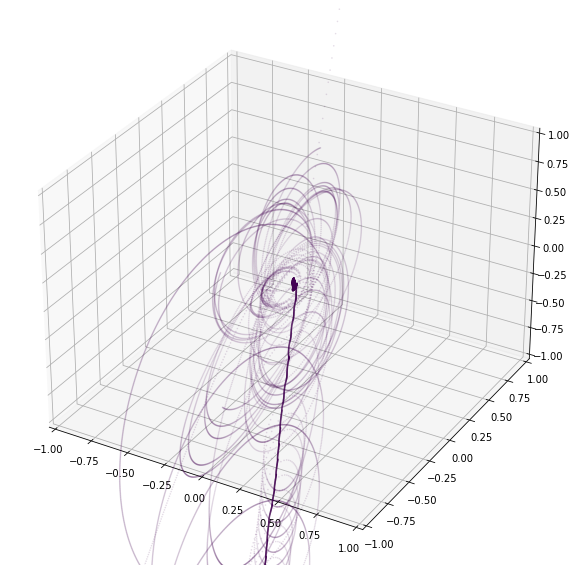

In [23]:
%matplotlib inline

# n bodies

n = 5
gconst = 1. # gravitational constant
tmax, tstep = 100. , 0.0001
t = np.arange(0, tmax, tstep)

# particles a, b, c
masses = np.asarray([1.0] * n) 
# masses += np.abs(np.random.randn(n)) * 0.1

# things to record for plotting
hist = np.zeros((t.shape[0], 3, n)) # positions
vels = np.zeros((t.shape[0], 3, n)) # velocities
                    
ang = np.arange(0, 2* pi, 2*pi/n)
pos = np.concatenate([np.zeros((1, n)), np.cos(ang)[None, :], np.sin(ang)[None, :]], axis=0)
pos[:, 0] = [0, 0, 0]
masses[0] = 100

vel = np.concatenate([np.zeros((1, n)), - np.sin(ang)[None, :], np.cos(ang)[None, :]], axis=0) * 6 
vel[:, 0] = [0, 0, 0]

# pos = np.random.randn(3, n)
# pos /= la.norm(pos, axis=0, keepdims=True)
# ang = np.arange(0, 2* pi, 2*pi/n)
# vel = np.concatenate([np.zeros((1, n)), - np.sin(ang)[None, :], np.cos(ang)[None, :]], axis=0)  

for ti, time in enumerate(tqdm(t)):
    
    # work out the forces
    this  = pos[:, :, None]
    other = pos[:, None, :]

    thism  = masses[None, :, None]
    otherm = masses[None, None, :]
    xmasses = thism * otherm
    assert xmasses.shape == (1, n, n)

    diff  = this - other # broadcasts to (3, n, n)
    dist = np.linalg.norm(diff, axis=0, keepdims=True)
    assert dist.shape == (1, n, n), f'{dist.shape}'
    
    # compute inverse square wherever the distance isn't zero
    invsq = np.zeros((1, n, n))
    mask = dist != 0.0
    invsq[mask] = dist[mask] ** -2

    unit = np.divide(diff, dist, where=mask)
    
    forces = unit * (invsq * xmasses) * (-gconst)
    
    assert forces.shape == (3, n, n), f'{forces.shape}'
    forces = forces.sum(axis=2)
    
    assert not np.isnan(forces).any()

#     forces = np.zeros((3, n))
#         for i in range(n):
#             p = pos[:, i]
#             m = masses[i]

#             for j in range(n):
#                 if i != j:
#                     otherp = pos[:, j]
#                     otherm = masses[j]

#                     dist = np.linalg.norm(p - otherp)
#                     unit = (p - otherp) / dist

#                     delta = - gconst * m * otherm * (1.0/(dist ** 2)) * unit
#                     forces[:, i] += delta

    # update the positions and velocities
    acc = forces / masses[None, :]
    vel += acc * tstep
    pos += vel * tstep
    
    # record in history
    hist[ti, :, :] = pos
    vels[ti, :, :] = vel
    
# plot histories

fig = plt.figure(figsize=(10, 30))
ax3d = fig.add_subplot(111, projection='3d')

colors = (np.arange(t.shape[0]) / t.shape[0]) ** 10 * 100 + 10

# mean = (hista * masses[0] + histb * masses[1] + histc * masses[2])/sum(masses)

# histc -= mean
# histb -= mean
# hista -= mean

s = 10
for i in range(n):
    ax3d.scatter(hist[::s, 0, i], hist[::s, 1, i], hist[::s, 2, i], c=colors[::s], alpha=0.1, s=.5)

# plt.legend()

# for i in range(t.shape[0]):
#     print(hista[i, :])
          
ax3d.set_xlim(-1, 1)
ax3d.set_ylim(-1, 1)
ax3d.set_zlim(-1, 1)



100%|██████████| 5/5 [00:00<00:00, 345.57it/s]


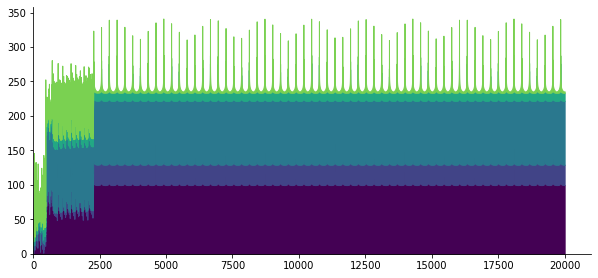

In [24]:
fig = plt.figure(figsize=(10,10))
axmm = fig.add_subplot(2, 1, 2)

# # total momentum (sanity check)
# mtot = np.linalg.norm((vels * masses[None, None, :]).sum(axis=2), axis=1) 
# axmo.plot(mtot)
# axmo.set_ylim(-1, 1)
# axmo.set_title('magnitude of total momentum')

# magnitudes of individual momenta
mm = np.linalg.norm((vels * masses[None, None, :]), axis=1) # res is (t, n)
stacked_bar(mm.T, axmm, step=50)
axmm.set_xlim(left=0)
axmm.set_ylim(bottom=0)
clean(axmm)


<IPython.core.display.Javascript object>


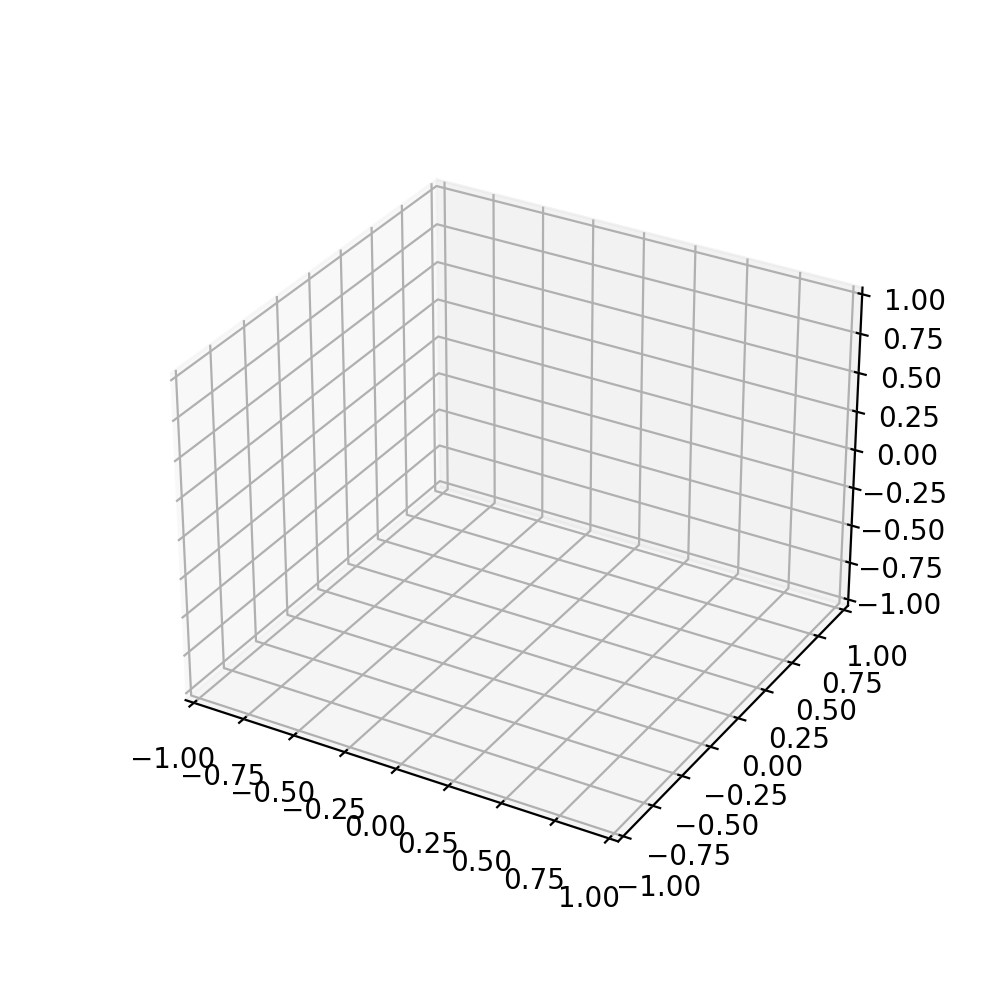

In [3]:
# n body animation
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation

import numpy as np
from math import pi

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

n = 10

# particles a, b, c
masses = np.asarray([1.0] * n)

# pos = np.random.rand(3, n) * 2 - 1 
ang = np.arange(0, 2* pi, 2*pi/n)
pos = np.concatenate([np.zeros((1, n)),   np.cos(ang)[None, :], np.sin(ang)[None, :]], axis=0)
vel = np.concatenate([np.zeros((1, n)), - np.sin(ang)[None, :], np.cos(ang)[None, :]], axis=0) 

time = 0

def anim(t):
    global pos, vel, masses
    n = pos.shape[1]
    gconst, tstep = 1, 0.000001
    
    for _ in range(1): # perform a few steps per frame

        # work out the forces
        this  = pos[:, :, None]
        other = pos[:, None, :]

        thism  = masses[None, :, None]
        otherm = masses[None, None, :]
        xmasses = thism * otherm
        assert xmasses.shape == (1, n, n)

        diff  = this - other # broadcasts to (3, n, n)
        dist = np.linalg.norm(diff, axis=0, keepdims=True)
        assert dist.shape == (1, n, n), f'{dist.shape}'

        # compute inverse square wherever the distance isn't zero
        invsq = np.zeros((1, n, n))
        mask = np.zeros((1, n, n))
        np.fill_diagonal(mask, 0)
        invsq[mask] = dist[mask] ** -2

        unit = np.divide(diff, dist, where=mask)

        forces = unit * (invsq * xmasses) * (-gconst)
        assert not np.isnan(forces).any()

        assert forces.shape == (3, n, n), f'{forces.shape}'
        forces = forces.sum(axis=2)

        # update the positions and velocities
        acc = forces / masses[None, :]
        vel += acc * tstep
        pos += vel * tstep
            
    return ax.plot(pos[0, :], pos[1, :], pos[2, :], '.', color='g',alpha=1.)[0],

an = matplotlib.animation.FuncAnimation(fig, anim, frames=None, interval=20, blit=True);

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()

x, y = 0, 1
vx, vy = 0.1, 0

def anfunc(i):  
    global x, y, vx, vy
    
    xold, yold = x, y
    step = 0.0001
    
    fx = - x
    fy = - y
    
    vx += fx * step
    vy += fy * step
    
    x += vx * step
    y += vy * step
    
    return ax.plot([xold, x], [yold, y])[0],

ani = matplotlib.animation.FuncAnimation(fig, anfunc)
ani